In [160]:
import sklearn as skl
import seaborn as sns
import pandas as pd
import lib.neuron as neuron

In [161]:
data = pd.read_csv("./data/marziani.csv")
data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,viola,29.0,4.55,35.48,68.47
1996,Simmy,blu,23.0,3.84,29.86,71.51
1997,Simmy,viola,22.0,4.55,29.41,68.38
1998,Simmy,rosso,27.0,4.53,33.12,68.10


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     2000 non-null   object 
 1   colore     1993 non-null   object 
 2   n_arti     1994 non-null   float64
 3   peso       2000 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1997 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [163]:
data["specie"].unique()

array(['Robby', 'Simmy'], dtype=object)

In [164]:
data[data["specie"] == "Robby"].describe()

,n_arti,peso,altezza,larghezza
count,999.000000,1000.000000,996.000000,999.000000
mean,24.637638,3.500900,17.518082,84.719429
std,2.899248,0.489139,4.227621,11.456814
min,20.000000,2.130000,3.170000,44.700000
25%,22.000000,3.170000,14.740000,77.045000
50%,25.000000,3.490000,17.330000,84.890000
75%,27.000000,3.830000,20.307500,92.510000
max,29.000000,5.050000,29.400000,117.450000


In [165]:
data[data["specie"] == "Simmy"].describe()

,n_arti,peso,altezza,larghezza
count,995.000000,1000.000000,999.000000,998.000000
mean,24.544724,4.490280,32.769620,70.241653
std,2.883513,0.518585,5.755694,3.345319
min,20.000000,2.850000,15.630000,59.440000
25%,22.000000,4.147500,29.070000,68.000000
50%,25.000000,4.505000,32.640000,70.330000
75%,27.000000,4.850000,36.475000,72.610000
max,29.000000,6.110000,49.750000,80.260000


In [166]:
data["colore"].unique()

array(['viola', 'blu', 'rosso', nan], dtype=object)

In [167]:
data_copy = data.copy()

colours = {key: value for key, value in zip(data["colore"].unique(), [0, 1, 2])}

for color in colours:
    data_copy["colore"].replace(color, colours[color], inplace = True)

data_copy

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,0.0,20.0,3.87,14.77,73.22
1,Robby,0.0,27.0,3.15,28.19,88.44
2,Robby,0.0,25.0,4.35,12.05,76.74
3,Robby,1.0,20.0,3.76,9.90,81.37
4,Robby,1.0,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,0.0,29.0,4.55,35.48,68.47
1996,Simmy,1.0,23.0,3.84,29.86,71.51
1997,Simmy,0.0,22.0,4.55,29.41,68.38
1998,Simmy,2.0,27.0,4.53,33.12,68.10


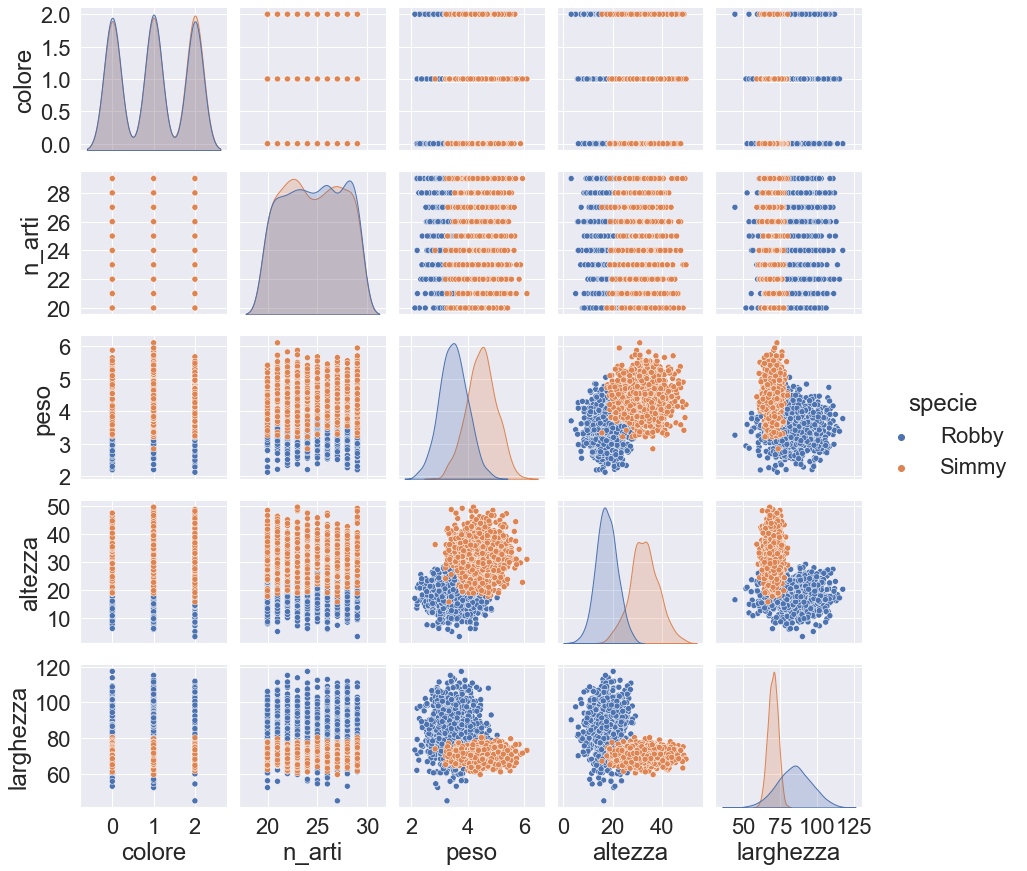

In [168]:
sns.set_theme(font_scale = 2)
sns.pairplot(data_copy, hue = "specie", dropna = True)
sns.set()

In [169]:
selected_feats = ["altezza"] #["peso", "altezza", "larghezza"]

print("\nBefore dropna()\n", [col for col in data_copy.columns if data_copy[col].isnull().sum()])

data_copy = data.dropna(axis='index', subset = selected_feats)

print("\nAfter dropna()\n", [col for col in data_copy.columns if data_copy[col].isnull().sum()])


Before dropna()
 ['colore', 'n_arti', 'altezza', 'larghezza']

After dropna()
 ['colore', 'n_arti', 'larghezza']


In [170]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     1995 non-null   object 
 1   colore     1988 non-null   object 
 2   n_arti     1989 non-null   float64
 3   peso       1995 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1992 non-null   float64
dtypes: float64(4), object(2)
memory usage: 109.1+ KB


In [171]:
X = data_copy[selected_feats].to_numpy()
y_str = data_copy["specie"]

X

array([[14.77],
       [28.19],
       [12.05],
       ...,
       [29.41],
       [33.12],
       [18.88]])

In [172]:
species = {key: value for key, value in zip(data_copy["specie"].unique(), [0, 1])}

for kind in species:
    y_str.replace(kind, species[kind], inplace = True)

y = y_str.to_numpy()
y

C:\Users\Nik\AppData\Local\Temp\ipykernel_5136\2665574909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_str.replace(kind, species[kind], inplace = True)


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [175]:
training_set_X, test_set_X, training_set_y, test_set_y = skl.model_selection.train_test_split(X, y, train_size=0.7, random_state=0)

In [176]:
n = neuron.Neuron(1, 50000, 0.17)
n.fit(training_set_X, training_set_y)

In [177]:
for i, dt in enumerate(test_set_X):
    res = n.active(dt)

    print(f"Perceptron: {round(res)}\tCorrect result: {test_set_y[i]}")

Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 0
Perceptron: 0	Correct result: 1
Perceptron: 0	Correct result: 0
Perceptr